# Фотометрическое определение титана

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, tstd
from scipy.interpolate import interpolate
from scipy.signal import find_peaks
import seaborn as sns
import mplcursors

In [8]:
float_formatter = "{:.2f}".format
def f(X, A, B):
    '''
    Y = AX + B
    '''
    return A * X + B
def f_1(Y, A, B):
    '''
    Y = AX + B
    Thus
    X = ( Y - B ) / A
    '''
    return (Y - B) / A

## Измерения

In [50]:
df = pd.read_csv('all-calibration-rel-to-water.csv',
                 delimiter=';', decimal=',',
                 engine='python', encoding="latin-1",
                 skiprows=[0,1], nrows=250)
df_ex = pd.read_csv('ex2.csv',
                           delimiter=';', decimal=',',
                           engine='python', encoding="latin-1",
                           skiprows=[0,1], nrows=150)
del df['Unnamed: 14']
del df_ex['Unnamed: 4']

In [51]:
col_names = []
exer_names = []
for i in range(1, 8):
    col_names.append( f'{i}-wl' )
    col_names.append( f'{i}-abs' )
for i in range(1, 3):
    exer_names.append( f'{i}-wl-ex' )
    exer_names.append( f'{i}-abs-ex' )

In [52]:
df.columns = col_names
df_ex.columns = exer_names

### Выделение максимумов

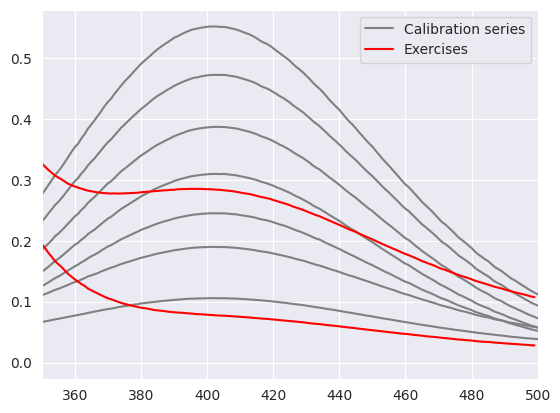

In [64]:
added_labels = set()

# Plot calibration series
for i in range(len(col_names) // 2):
    label = 'Calibration series'
    if label not in added_labels:
        plt.plot(df[names[i * 2]], df[names[i * 2 + 1]], color='gray', label=label)
        added_labels.add(label)
    else:
        plt.plot(df[names[i * 2]], df[names[i * 2 + 1]], color='gray')

# Plot exercises
for i in range(len(exer_names) // 2):
    label = 'Exercises'
    if label not in added_labels:
        plt.plot(df_ex[exer_names[i * 2]], df_ex[exer_names[i * 2 + 1]], color='red', label=label)
        added_labels.add(label)
    else:
        plt.plot(df_ex[exer_names[i * 2]], df_ex[exer_names[i * 2 + 1]], color='red')

plt.legend()
plt.savefig('titanium.svg')
plt.xlim(350, 500)

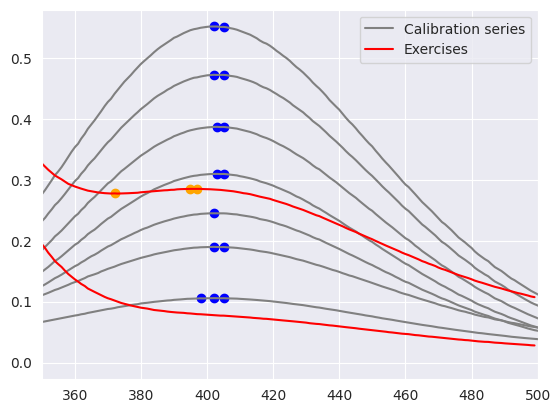

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

# Sample data creation (replace this with your actual DataFrame)
# df = pd.DataFrame({...})
# df_ex = pd.DataFrame({...})

# Assuming col_names and exer_names are your column names
added_labels = set()

# Plot calibration series
for i in range(len(col_names) // 2):
    label = 'Calibration series'
    
    # Plot the data
    if label not in added_labels:
        plt.plot(df[names[i * 2]], df[names[i * 2 + 1]], color='gray', label=label)
        added_labels.add(label)
    else:
        plt.plot(df[names[i * 2]], df[names[i * 2 + 1]], color='gray')

    # Find peaks
    peaks, _ = find_peaks(df[names[i * 2 + 1]])
    
    # Annotate peaks
    plt.scatter(df[names[i * 2]].iloc[peaks], df[names[i * 2 + 1]].iloc[peaks], color='blue', marker='o')

# Plot exercises
for i in range(len(exer_names) // 2):
    label = 'Exercises'
    
    # Plot the data
    if label not in added_labels:
        plt.plot(df_ex[exer_names[i * 2]], df_ex[exer_names[i * 2 + 1]], color='red', label=label)
        added_labels.add(label)
    else:
        plt.plot(df_ex[exer_names[i * 2]], df_ex[exer_names[i * 2 + 1]], color='red')

    # Find peaks
    peaks, _ = find_peaks(df_ex[exer_names[i * 2 + 1]])
    
    # Annotate peaks
    plt.scatter(df_ex[exer_names[i * 2]].iloc[peaks], df_ex[exer_names[i * 2 + 1]].iloc[peaks], color='orange', marker='o')

plt.legend()
plt.savefig('titanium.svg')
plt.xlim(350, 500)
mplcursors.cursor()

## Анализ данных

In [4]:
# выбранная lambda = nm
V_cal = np.array([1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00])
c_std = 0.500
c_cal = V_cal * c_std
V_flask = 100
#A_cal = np.array([])
# A_exer = 

In [6]:
print('Examined mass is', float_formatter(c_exer)+'mg')

NameError: name 'c_exer' is not defined

In [ ]:
sd = 0
for i in range(len(A_cal)):
    sd += ( A_cal[i] - f(c_cal[i], params[0], params[1]) ) ** 2
sd = sd ** 0.5
print('Standart deviation is', sd)

In [ ]:
M_ti = 47.87 * 10**3 # mg/mol
l = 9.98 
eps = params[0] * M_ti / ( l )
eps